## Jupyter notebook for clustering dynamical ATAC-seq data by Gaussian process hierarchical clustering method

This notebook is the code for clustering ATAC-seq data and produce Fig. 2c used in the paper 
**"Simultaneous analysis of open chromatin, promoter interactions and gene expression in stimulated T cells implicates causal genes for rheumatoid arthritis"** 
by *Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre*.

Author : *Jing Yang*  <br />
Date: 24-10-2019 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

### load packages required for later clustering

In [1]:
import numpy as np
import pylab as pb
import pandas as pd
import matplotlib.patches as patches
from matplotlib import pyplot as plt
%matplotlib inline
import sys
import GPy
from GPy import kern ### GPy package for GP regression
import GPclust ### GP clustering package for data clustering
from GPclust import MOHGP
pb.ion()


In [2]:
np.random.seed(1) ### setup random seed

### load the data for clustering. ATACseq data here are dynamical data with LR<-1 and outside TSS region

In [3]:
data = np.loadtxt('data/ATACseq_forcluster.csv', delimiter=',',skiprows=1, usecols=range(4,10))


In [5]:
data.shape

(9680, 6)

### normalize the data

In [6]:
data_tmp = data.T - data.T.mean(axis=0)
data_tmp = data_tmp / data_tmp.std(axis=0)
data_normalized = data_tmp.T

### start GP clustering

In [9]:
times_new = np.array((0,1,2,3,4,5))
kern_cluster = GPy.kern.Matern32(input_dim=1, variance=1., lengthscale=5.)
kern_gene = GPy.kern.Matern32(input_dim=1, variance=0.1, lengthscale=2.) + GPy.kern.White(1,0.001)
X = times_new[:,None]
alpha =0.1 ### DP concentration
Nclust = 6 ### initial number of clusters
m = MOHGP(X,kern_cluster,kern_gene,data_normalized,K=Nclust)
m.optimize()
print(m)

 /home/jing/miniconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning:The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.


iteration 1 bound=-583252.5526051467 grad=6730.7377044408995, beta=0
iteration 2 bound=-482268.96470416366 grad=2699103.2404008834, beta=44.6232865425159
iteration 3 bound=-313511.15935727285 grad=123847.07472791045, beta=0.0
iteration 4 bound=-302718.7984220956 grad=28201.071037389163, beta=0.0
iteration 5 bound=-299536.50490928156 grad=4078.625211986991, beta=0.0
iteration 6 bound=-297403.9902836185 grad=2284.2916281154658, beta=0.1751350922969766
iteration 7 bound=-295947.8957344627 grad=1472.6576511705098, beta=0.0
iteration 8 bound=-294331.06295526715 grad=1645.2032772740176, beta=0.0
iteration 9 bound=-290975.75450133346 grad=1743.1143645317666, beta=1.298705258338487
iteration 10 bound=-289623.026118353 grad=1315.8773519648216, beta=0.0
iteration 11 bound=-288185.0630411619 grad=1487.246762173162, beta=0.0
iteration 12 bound=-284766.6654425106 grad=1549.840861571522, beta=1.7978636261096999
iteration 13 bound=-282997.26181051857 grad=1868.2991908655326, beta=0.0
iteration 14 bou

iteration 91 bound=-65205.59739219792 grad=0.2611968816232475, beta=0.5439088511931971
iteration 92 bound=-65205.27014267142 grad=0.13804369127640417, beta=0.5859420928665011
iteration 93 bound=-65205.114510712956 grad=0.06785318914890864, beta=0.552680558998967
iteration 94 bound=-65205.04461734444 grad=0.032951523843851686, beta=0.5236777431864571
iteration 95 bound=-65205.012696721074 grad=0.016417389974674217, beta=0.5101351227313358
iteration 96 bound=-65204.996965219405 grad=0.008739204808762883, beta=0.4984424196455106
iteration 97 bound=-65204.988097173475 grad=0.004922154315446644, beta=0.5419725247208332
iteration 98 bound=-65204.98304590283 grad=0.002758008077432844, beta=0.5418354498107845
iteration 99 bound=-65204.98012754145 grad=0.001556062308963884, beta=0.5519163718724771
iteration 100 bound=-65204.9784616559 grad=0.0008636097231344349, beta=0.5566703238556161
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i    f              |g|        
    00s01  02   6.22

### show clustering result

 /home/jing/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning:
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


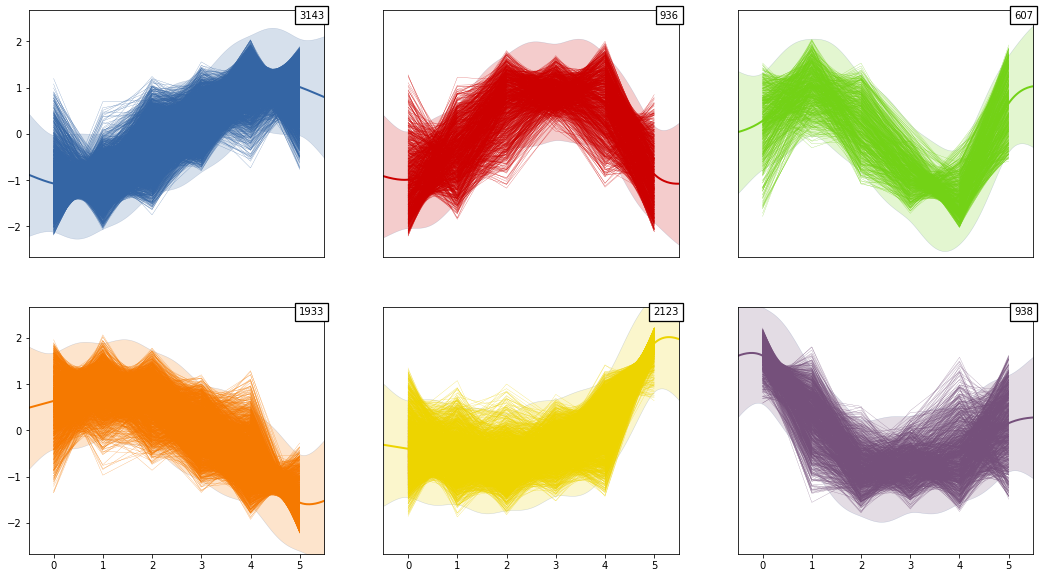

In [10]:
m.reorder()
fig = plt.figure(figsize=(18,10))
m.plot(on_subplots=True, colour=True, newfig=False)

### save cluster results

In [11]:
cluster_result = m.phi.argmax(1)

### show MOTIF results on the clusters. MOTIFs were searched by findMotifGenome.pl from HOMER

In [12]:
motif00 = ('Fra1', 'Atf3', 'Fra2','AP-1', 'Jun-AP1')
motif01 = ('JunB','Fosl2','BATF','Bach2',' NFAT:AP1')
motif10 = ('ETV1', 'Etv2', 'ERG','Fli1','Bach2','Fra2')
#motif11 = ('EWS:ERG-fusion','','DMRT6','HIC1','EWS:FLI1-fusion')
motif2 = ('CTCF','BORIS','DLx3')
motif31 = ('RFX','Rfx2','Rfx1','Rfx5','X-box')
motif32 = ('BORIS','Foxo3','FOXK2',' ETS:RUNX1')
motif41 = ('BATF','Atf3','Fra1','JunB', 'Jun-AP1')
motif42 = ('Fra2','Fosl2','AP-1','bZIP','IRF:BATF')
motif5 = ('CTCF','BORIS')

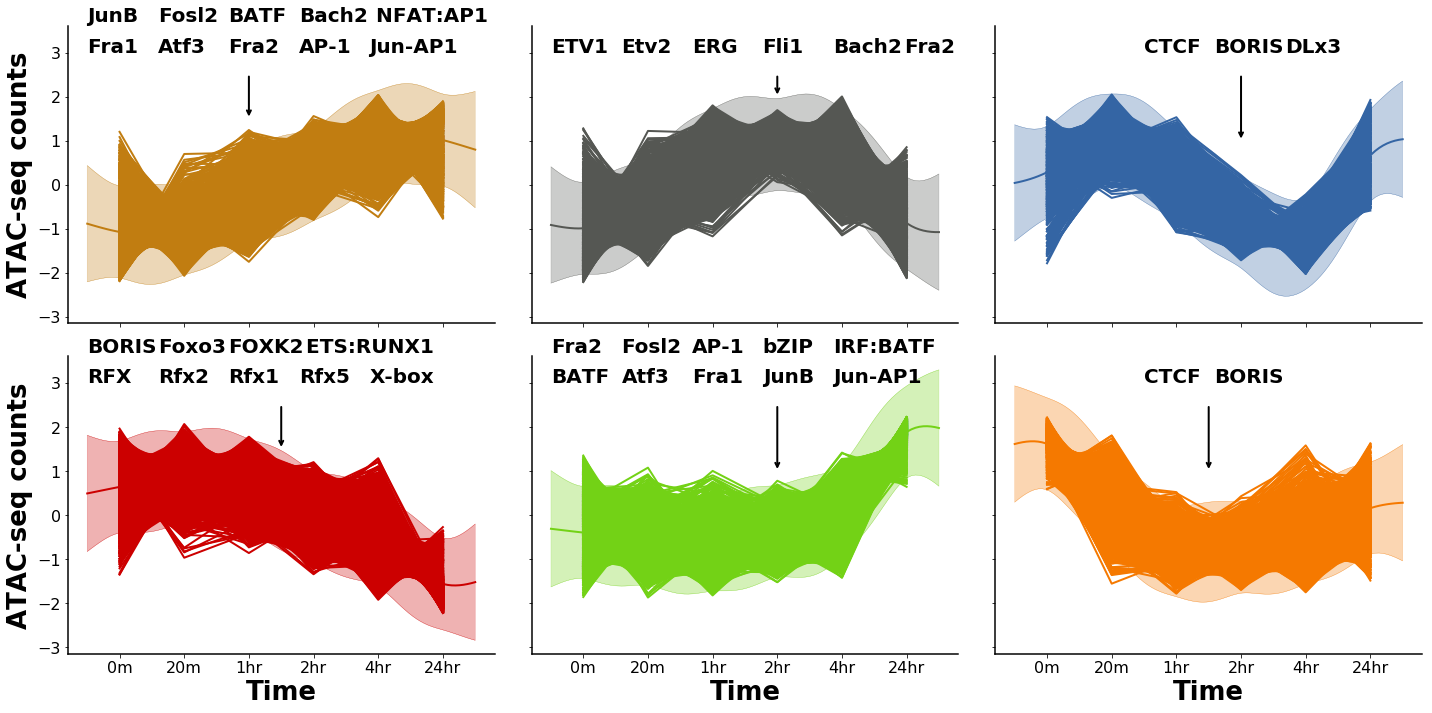

In [13]:
Xnew = np.linspace(X.min()-0.5, X.max()+0.5, 100)[:,None]
fig, ax = plt.subplots(2, 3, figsize=(20,10), sharex=True, sharey=True)
for ii in range(6):
    lower_tmp = m.predict_components(Xnew)[0][ii]-2*np.sqrt(np.diag(m.predict_components(Xnew)[1][ii]))
    upper_tmp = m.predict_components(Xnew)[0][ii]+2*np.sqrt(np.diag(m.predict_components(Xnew)[1][ii]))

    y1=np.squeeze(data_normalized[np.where(cluster_result==ii),:]).T
    #1=np.squeeze(np.tile(times_new, y1.shape))
    col = GPy.plotting.Tango.nextMedium()
    #print(int(ii%3))
    #print(int(ii/3))
    ax_current = ax[int(ii/3), int(ii%3)]
    for pos in ['top','bottom','left','right']:
        ax_current.spines[pos].set_linewidth(1.5)
    ax_current.plot(times_new,y1,color=col,marker=None, linewidth=2, alpha=1)
    GPy.plotting.matplot_dep.base_plots.gpplot(x=Xnew, mu=m.predict_components(Xnew)[0][ii], lower=lower_tmp,
upper=upper_tmp, ax=ax_current, edgecol=col, fillcol=col)
    ax_current.spines['right'].set_visible(False)
    ax_current.spines['top'].set_visible(False)

ax[0,0].arrow(5, 5, 1, 2, width=1.5, fc='k', ec='k')

for k, style in enumerate(motif00):
    ax[0,0].text(Xnew[k*18], 3, style, weight='black', family='sans-serif', rotation=0, size=20)
for k, style in enumerate(motif01):
    ax[0,0].text(Xnew[k*18], 3.7, style, weight='black', family='sans-serif', rotation=0, size=20)
for k, style in enumerate(motif10):    
    ax[0,1].text(Xnew[k*18], 3, style, weight='black', family='sans-serif', rotation=0, size=20)    
for k, style in enumerate(motif2):
    ax[0,2].text(Xnew[k*18]+2, 3, style, weight='black',family='sans-serif', rotation=0, size=20)
for k, style in enumerate(motif31):
    ax[1,0].text(Xnew[k*18], 3, style, weight='black',family='sans-serif', rotation=0, size=20)
for k, style in enumerate(motif32):
    ax[1,0].text(Xnew[k*18], 3.7, style, weight='black',family='sans-serif', rotation=0, size=20)
for k, style in enumerate(motif41):
    ax[1,1].text(Xnew[k*18], 3, style, weight='black',family='sans-serif', rotation=0, size=20)
for k, style in enumerate(motif42):
    ax[1,1].text(Xnew[k*18], 3.7, style,weight='black',family='sans-serif', rotation=0, size=20)  
for k, style in enumerate(motif5):
    ax[1,2].text(Xnew[k*18]+2, 3, style, weight='black',family='sans-serif', rotation=0, size=20)

ax[0,0].arrow(5, 5, 1, 2, width=1.5, fc='k', ec='k')
ax[0,0].annotate("", xy=(2, 1.5), xytext=(2, 2.5), arrowprops=dict(arrowstyle="->", linewidth=2))
ax[0,1].annotate("", xy=(3, 2), xytext=(3, 2.5), arrowprops=dict(arrowstyle="->", linewidth=2))
ax[0,2].annotate("", xy=(3, 1), xytext=(3, 2.5), arrowprops=dict(arrowstyle="->", linewidth=2))
ax[1,0].annotate("", xy=(2.5, 1.5), xytext=(2.5, 2.5), arrowprops=dict(arrowstyle="->", linewidth=2))
ax[1,1].annotate("", xy=(3, 1), xytext=(3, 2.5), arrowprops=dict(arrowstyle="->", linewidth=2))
ax[1,2].annotate("", xy=(2.5, 1), xytext=(2.5, 2.5), arrowprops=dict(arrowstyle="->", linewidth=2))
ax[0,0].set_ylabel('ATAC-seq counts', fontsize=26,weight='bold')
ax[1,0].set_ylabel('ATAC-seq counts', fontsize=26,weight='bold')
ax[1,0].set_xlabel('Time', fontsize=26, weight='bold')
ax[1,1].set_xlabel('Time', fontsize=26, weight='bold')
ax[1,2].set_xlabel('Time', fontsize=26, weight='bold')
ax[0,0].tick_params(axis='y', which='major', labelsize=16)
ax[0,0].tick_params(axis='y', which='minor', labelsize=16)
ax[1,0].tick_params(axis='both', which='major', labelsize=16)
ax[1,0].tick_params(axis='both', which='minor', labelsize=16)
ax[1,1].tick_params(axis='both', which='major', labelsize=16)
ax[1,1].tick_params(axis='both', which='minor', labelsize=16)
plt.xticks(ticks=(0,1,2,3,4,5),labels=('0m','20m','1hr','2hr','4hr','24hr'))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
plt.tight_layout()
#plt.savefig('../ATACSeq_6cluster_withMOTIF_nolabel.png')

### save the results

In [16]:
np.savetxt('data/ATACseq_withcluster.txt',np.hstack((data_normalized, cluster_result[:,None])),fmt= ' '.join(['%f']*6 + ['%i']))
